In [1]:
import pandas as pd
import matplotlib.pyplot as plt

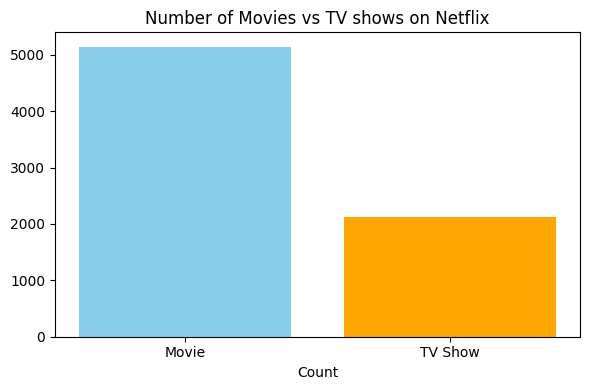

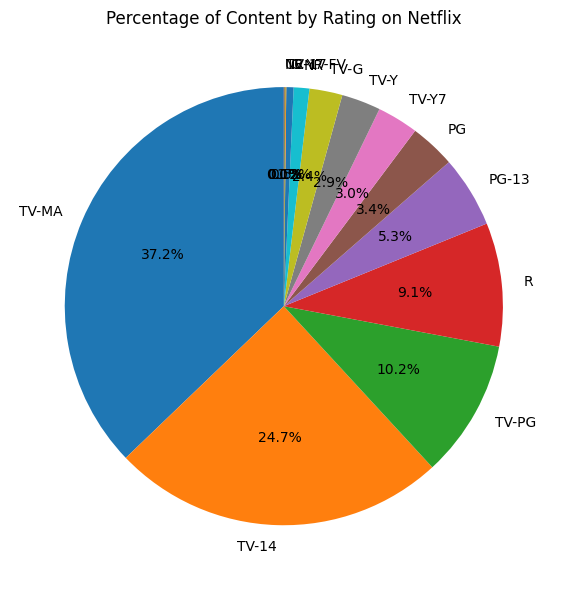

In [ ]:
df = pd.read_csv('netflix_titles.csv')
# print(df)

'''
df = df.dropna(subset=['type','release_year','rating','country','duration'])
Removes rows from the DataFrame that contain missing values (NaN).
Instead of checking the whole row, it only looks at the specific columns you listed
A row will be dropped if any of these columns has a NaN.
'''
df = df.dropna(subset=['type','release_year','rating','country','duration'])

type_count = df['type'].value_counts() #value_counts() - Counts how many times each unique value appears in that column. and
# It automatically sorts the counts in descending order
plt.figure(figsize=(6,4))
plt.bar(type_count.index, type_count.values, color=['skyblue','orange'])
plt.title('Number of Movies vs TV shows on Netflix')
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()

rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Content by Rating on Netflix')
plt.tight_layout()
plt.savefig('content_rating_pie.png')
plt.show()

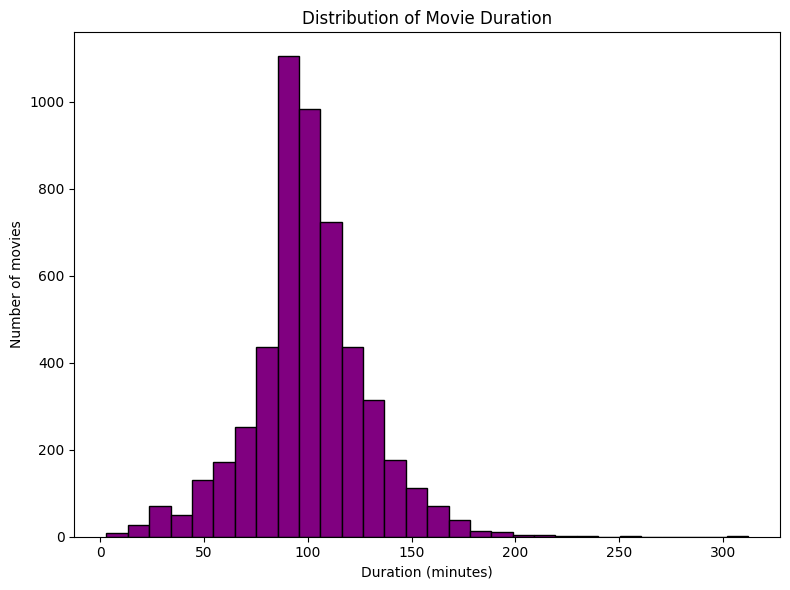

In [11]:
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min', '').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Movie Duration')
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of movies")
plt.tight_layout()
plt.savefig('movie_duration_histogram.png')
plt.show()

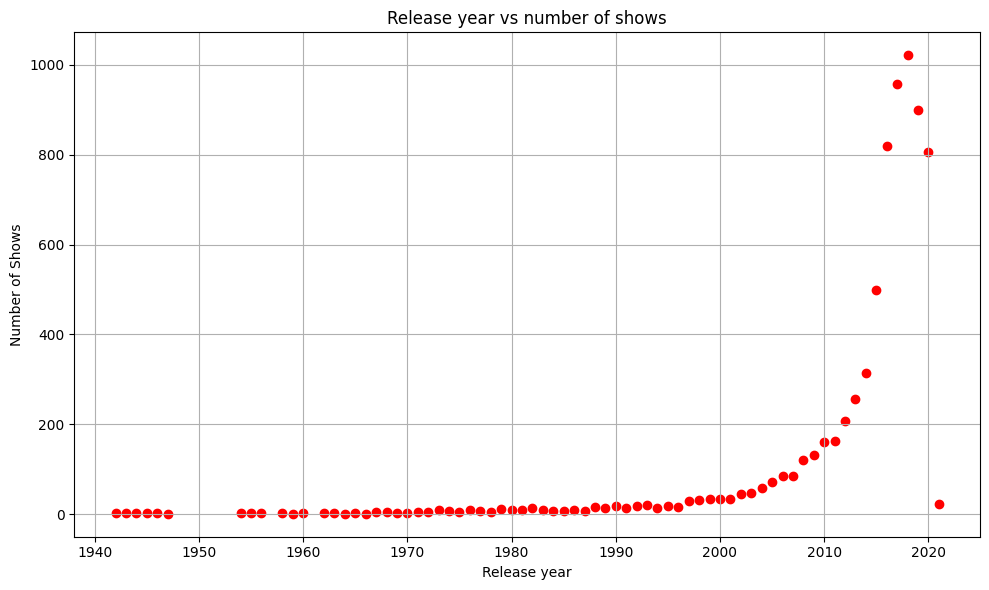

In [13]:
release_count = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_count.index, release_count.values, color='red')
plt.title('Release year vs number of shows')
plt.xlabel("Release year")
plt.ylabel("Number of Shows")
plt.tight_layout()
plt.grid()
plt.savefig('release_year_scatter.png')
plt.show()

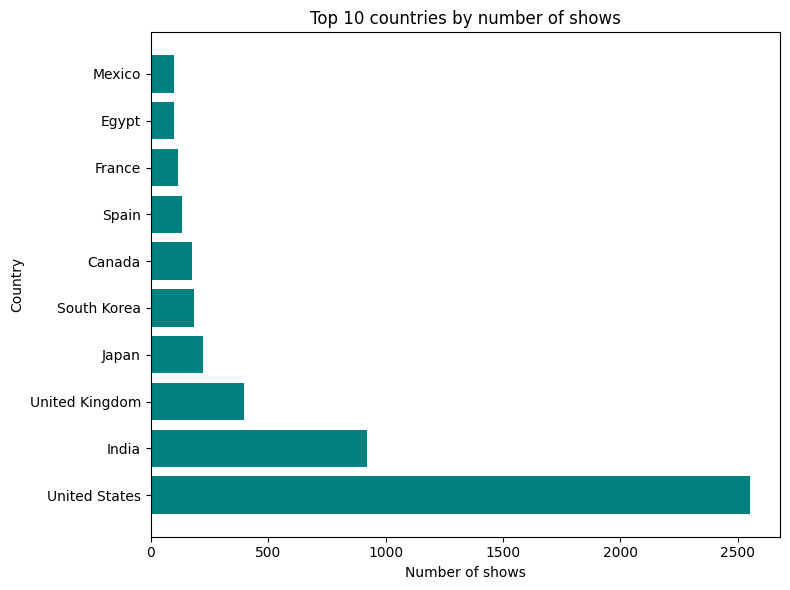

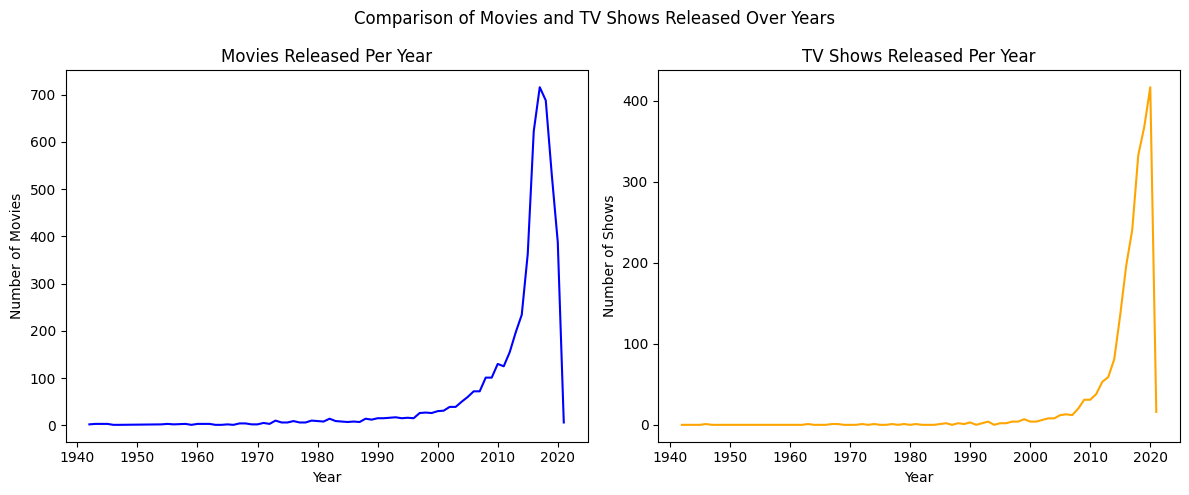

In [17]:
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index, country_counts.values, color='teal')
plt.title('Top 10 countries by number of shows')
plt.xlabel("Number of shows")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig('Top_10_country.png')
plt.show()


content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)
fig, ax = plt.subplots(1,2, figsize=(12,5))

# first subplot
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')


# second subplot
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='orange')
ax[1].set_title('TV Shows Released Per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of Shows')

fig.suptitle('Comparison of Movies and TV Shows Released Over Years')

plt.tight_layout()
plt.savefig('movies_tv_shows_comparison.png')
plt.show()